### Question :

1. Consider the Taj Mahal image below, generate noisy images by adding Uniform, Gaussian, Salt and pepper noise to an input image. Observe the performance of smoothing filters in the spatial domain.
2. Given the night vision image as 2.jpg  
    a. Apply suitable filtering techniques to improve the contrast of the images.\
    b. Generate a histogram of the image and observe how the intensity values are distributed\
    c. Apply histogram equalization and matching

1. Consider the Taj Mahal image below, generate noisy images by adding Uniform, Gaussian, Salt and pepper noise to an input image. Observe the performance of smoothing filters in the spatial domain.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename1 = 'tajMahal.jpg'
img1 = cv2.imread(filename1)

In [3]:
print(img1.shape)

(825, 1280, 3)


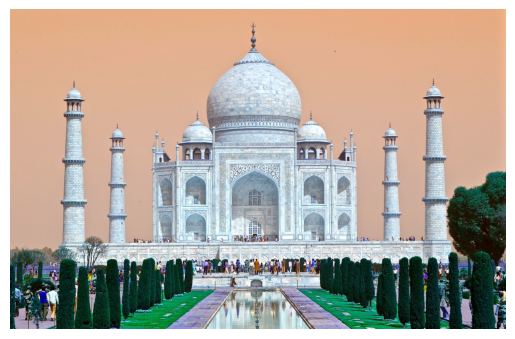

In [4]:
plt.imshow(img1)
plt.axis('off')
plt.show()

#### Uniform Noise

In [5]:
noise_strength = 70
uniform_noise = np.random.uniform(-noise_strength, noise_strength, size=img1.shape).astype(np.uint8)

In [7]:
uniform_noisy_image = np.clip(img1 + noise_strength, 0, 255).astype(np.uint8)

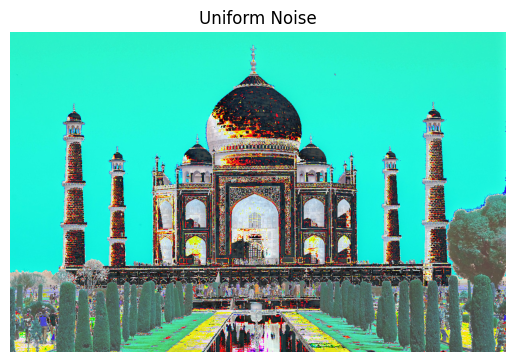

In [8]:
plt.title('Uniform Noise')
plt.imshow(uniform_noisy_image)
plt.axis('off')
plt.show()

#### Gaussian Noise

In [9]:
mean, std_dev = 0, 50
gaussian_noise = np.random.normal(mean, std_dev, img1.shape).astype(np.uint8)

In [10]:
gaussian_noisy_image = np.clip(img1 + gaussian_noise, 0, 255).astype(np.uint8)

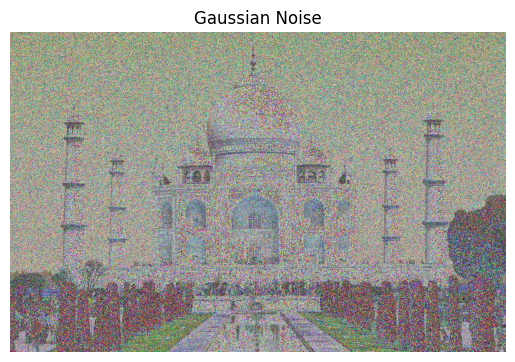

In [11]:
plt.title('Gaussian Noise')
plt.imshow(gaussian_noisy_image)
plt.axis('off')
plt.show()

#### Salt and Pepper Noise

In [12]:
salt_pepper_image = np.copy(img1)

In [13]:
salt_pepper_probability = 0.72
salt_pepper_noise = np.random.random(salt_pepper_image.shape[:2]) # generates noise with same shape as image

In [14]:
salt_pepper_image[salt_pepper_noise < salt_pepper_probability/2] = 255

In [15]:
salt_pepper_image[salt_pepper_noise > 1 - salt_pepper_probability/2] = 0

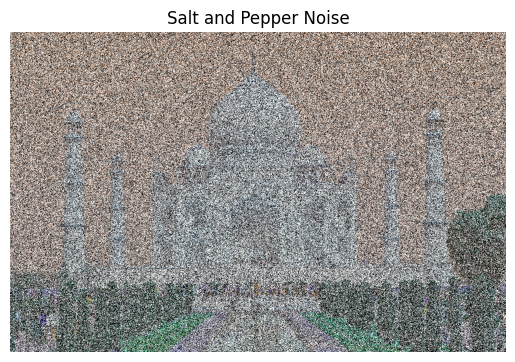

In [16]:
plt.title('Salt and Pepper Noise')
plt.imshow(salt_pepper_image)
plt.axis('off')
plt.show()

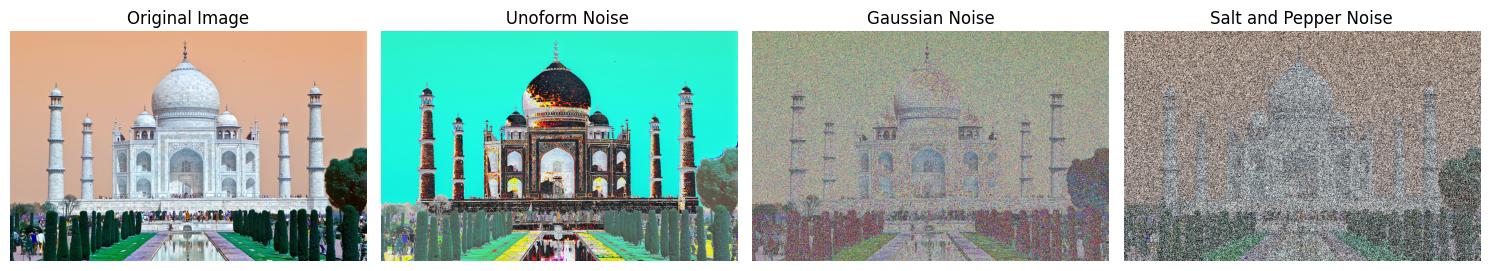

In [39]:
titles = ['Original Image', '   Unoform Noise', 'Gaussian Noise', 'Salt and Pepper Noise']
plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow([img1, uniform_noisy_image, gaussian_noisy_image, salt_pepper_image][i])
    plt.title(titles[i])
plt.tight_layout()
plt.show()

2. Given the night vision image as NightVision.jpg  
- Apply suitable filtering techniques to improve the contrast of the images.
- Generate a histogram of the image and observe how the intensity values are distributed
- Apply histogram equalization and matching

In [17]:
filename2 = 'NightVision.jpg'
img2 = cv2.imread(filename2)

In [18]:
print(img2.shape)

(199, 253, 3)


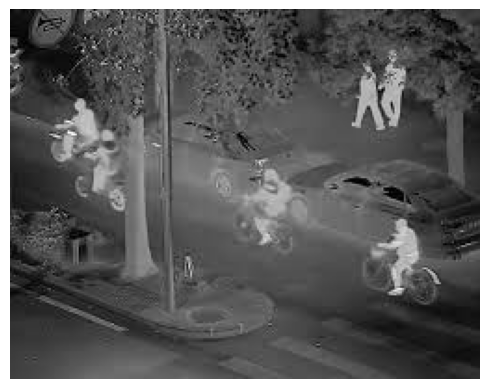

In [19]:
plt.imshow(img2)
plt.axis('off')
plt.show()

#### Gamma Correction

In [20]:
gamma = 1.75
gamma_corrected_img = np.power(img2 / 255.0, gamma)

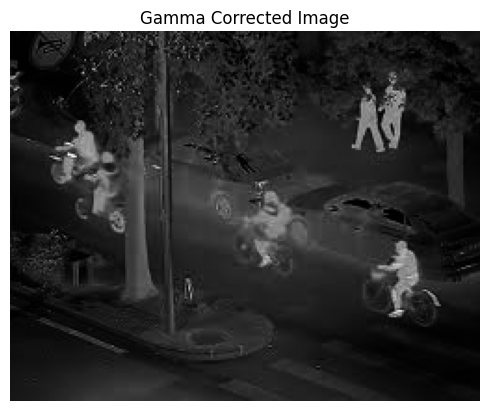

In [21]:
plt.title('Gamma Corrected Image')
plt.imshow(gamma_corrected_img)
plt.axis('off')
plt.show()

#### Logarithmic Transformation

In [22]:
c = 255 / np.log(1 + np.max(img2))
log_transformed_img = c * (np.log(gamma_corrected_img + 1.5))

In [23]:
log_transformed_img_normalized = ((log_transformed_img - np.min(log_transformed_img)) / (np.max(log_transformed_img) - np.min(log_transformed_img)) * 255).astype(np.uint8)

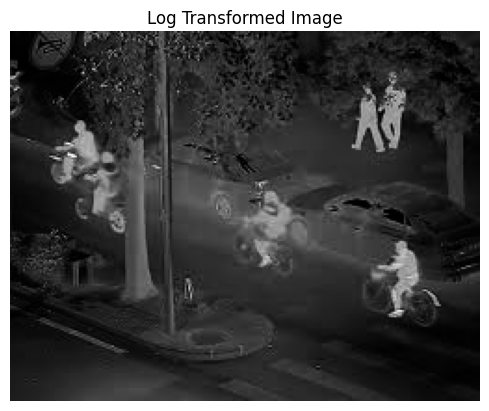

In [24]:
plt.title('Log Transformed Image')
plt.imshow(log_transformed_img_normalized)
plt.axis('off')
plt.show()

#### Piecewise Linear Transformation

In [25]:
def piecewise_linear_transform(img, breakpoints, slopes):
    out_img = np.piecewise(img, [img < breakpoints[0], (img >= breakpoints[0]) & (img < breakpoints[1]), img >= breakpoints[1]], [lambda x: slopes[0] * x, lambda x: slopes[1] * (x - breakpoints[0]) + slopes[0] * breakpoints[0], lambda x: slopes[2] * (x - breakpoints[1]) + slopes[1] * (breakpoints[1] - breakpoints[0]) + slopes[0] * breakpoints[0]])
    return np.clip(out_img, 0, 255).astype(np.uint8)

In [26]:
breakpoints = [1, 0.5]
slopes = [1, 2, 1]
piecewise_img = piecewise_linear_transform(log_transformed_img_normalized, breakpoints, slopes)

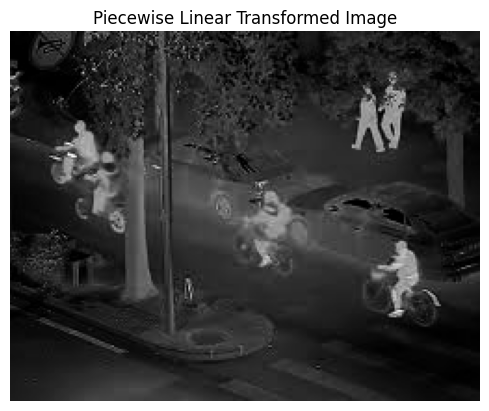

In [27]:
plt.title('Piecewise Linear Transformed Image')
plt.imshow(piecewise_img)
plt.axis('off')
plt.show()

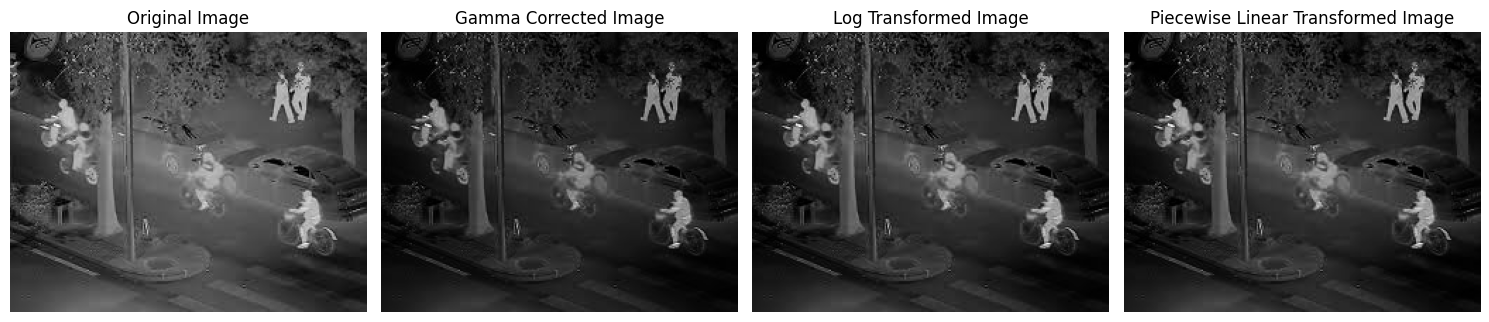

In [37]:
titles = ['Original Image', 'Gamma Corrected Image', 'Log Transformed Image', 'Piecewise Linear Transformed Image']
plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow([img2, gamma_corrected_img, log_transformed_img_normalized, piecewise_img][i])
    plt.title(titles[i])
plt.tight_layout()
plt.show()

#### Histogram of the image

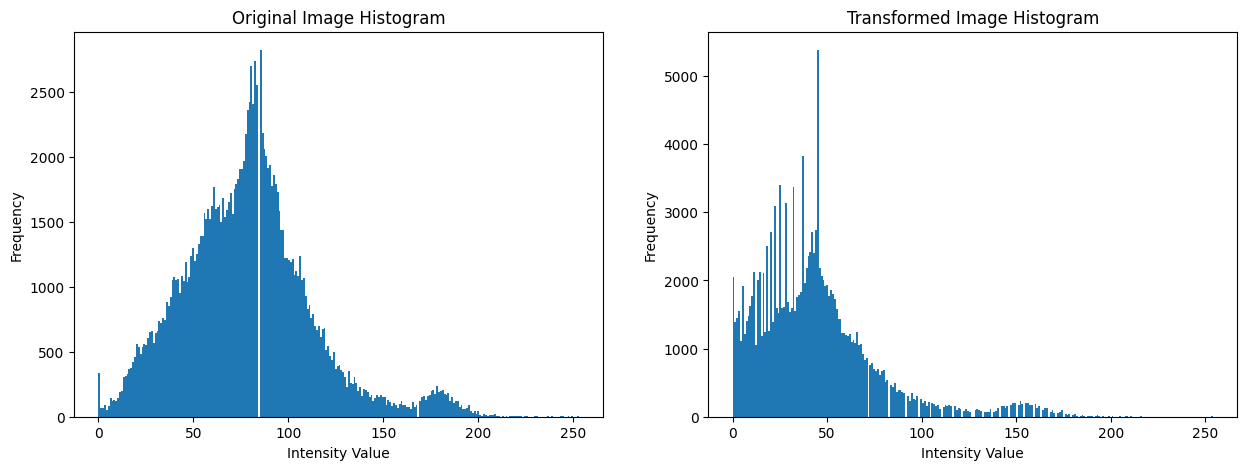

In [59]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(img2.ravel(), bins=256)
plt.title('Original Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(piecewise_img.ravel(), bins=256)
plt.title('Transformed Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

#### Histogram Equalization

In [70]:
equalized_img = cv2.equalizeHist(cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY))

Text(0, 0.5, 'Frequency')

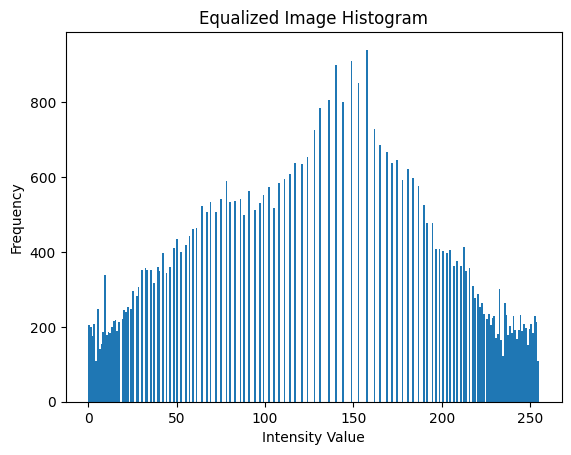

In [73]:
plt.hist(equalized_img.ravel(), bins=256)
plt.title('Equalized Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

#### Histogram Matching

In [107]:
target_hist = cv2.calcHist([img2], [0], None, [256], [0, 256])
matched_img = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

In [108]:
matched_img = cv2.normalize(matched_img, matched_img, 0, 255, cv2.NORM_MINMAX).flatten()

In [109]:
matched_img = np.interp(img2.flatten(), np.arange(256), matched_img).reshape(img2.shape).astype(np.uint8)

Text(0, 0.5, 'Frequency')

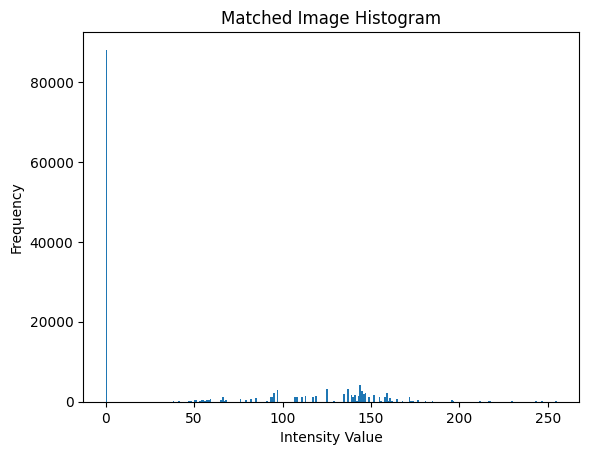

In [110]:
plt.hist(matched_img.ravel(), bins=256)
plt.title('Matched Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')